In [122]:
import math

import numpy as np
import soundfile as sr
import matplotlib.pyplot as plt

In [123]:
#2.1)

speech_data_tuple = sr.read("resources/female8khz.wav")
speech_data = speech_data_tuple[0]
sampling_rate = speech_data_tuple[1]

In [124]:
def my_windowing(v_signal: np.ndarray, sampling_rate: int, frame_length: int, frame_shift: int) -> [np.ndarray, np.ndarray]:
    millis_per_sample = 1000 / sampling_rate
    frame_length_num_points = frame_length / millis_per_sample
    frame_shift_num_points = frame_shift / millis_per_sample
    num_frames = int(np.floor((len(v_signal) - frame_length_num_points) / frame_shift_num_points) + 1)
    m_frames = np.zeros((num_frames, int(frame_length_num_points)))
    v_time_frame = np.zeros(num_frames)
    for i in range(num_frames):
        start = int(i * frame_shift_num_points)
        end = int(i * frame_shift_num_points + frame_length_num_points)
        m_frames[i] = v_signal[start:end]
        v_time_frame[i] = (start + end)/(2*sampling_rate)
    return [m_frames, v_time_frame]

In [125]:
frame_length = 32
frame_shift = 8

m_frames, v_time_frame = my_windowing(speech_data, sampling_rate, frame_length, frame_shift)

In [126]:
v_time_frame.shape

(278,)

2.1.a) The signal is segmented because analyzing the whole signal at once might be too computationally expensive, particularly for longer audio segments. When doing convolutions both to analyze the signal in the frequency domain or apply analysis windows padding has to be done, this padding grows proportionally to the audio segment length. Therefore, it is more efficient to segment the audio signal in smaller segments.

2.1.b) Typically, 32ms length segment is considered appropriate for speech signal processing. This is because it has been found to be a good compromise between having a small segment length in terms of reducing computational complexity and having a segment long enough to capture the frequency characteristics of speech signals.

In [127]:
#2.2)
def compute_power(x):
    return np.sqrt(sum(abs(x)**2))/len(x)

In [128]:
powers = np.zeros(m_frames.shape[0])
powers

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [129]:
m_frames[0]

array([-4.27246094e-04,  6.10351562e-05, -3.05175781e-05,  6.10351562e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -3.05175781e-05,  6.10351562e-05,  0.00000000e+00,
        6.10351562e-05,  3.05175781e-05,  3.05175781e-05,  3.05175781e-05,
        0.00000000e+00,  6.10351562e-05,  6.10351562e-05,  0.00000000e+00,
        3.05175781e-05,  6.10351562e-05,  9.15527344e-05,  6.10351562e-05,
        3.05175781e-05, -3.05175781e-05,  6.10351562e-05,  3.05175781e-05,
       -3.05175781e-05,  0.00000000e+00,  3.05175781e-05,  6.10351562e-05,
        6.10351562e-05, -3.05175781e-05,  3.05175781e-05,  0.00000000e+00,
        3.05175781e-05,  0.00000000e+00, -3.05175781e-05,  0.00000000e+00,
        9.15527344e-05,  3.05175781e-05,  3.05175781e-05,  3.05175781e-05,
        0.00000000e+00,  0.00000000e+00,  3.05175781e-05,  6.10351562e-05,
        6.10351562e-05,  6.10351562e-05,  0.00000000e+00,  6.10351562e-05,
        3.05175781e-05,  

In [130]:
for idx, item in enumerate(m_frames):
    powers[idx] = compute_power(item)

powers.shape

(278,)

In [131]:
v_time_frame*sampling_rate

array([  128.,   192.,   256.,   320.,   384.,   448.,   512.,   576.,
         640.,   704.,   768.,   832.,   896.,   960.,  1024.,  1088.,
        1152.,  1216.,  1280.,  1344.,  1408.,  1472.,  1536.,  1600.,
        1664.,  1728.,  1792.,  1856.,  1920.,  1984.,  2048.,  2112.,
        2176.,  2240.,  2304.,  2368.,  2432.,  2496.,  2560.,  2624.,
        2688.,  2752.,  2816.,  2880.,  2944.,  3008.,  3072.,  3136.,
        3200.,  3264.,  3328.,  3392.,  3456.,  3520.,  3584.,  3648.,
        3712.,  3776.,  3840.,  3904.,  3968.,  4032.,  4096.,  4160.,
        4224.,  4288.,  4352.,  4416.,  4480.,  4544.,  4608.,  4672.,
        4736.,  4800.,  4864.,  4928.,  4992.,  5056.,  5120.,  5184.,
        5248.,  5312.,  5376.,  5440.,  5504.,  5568.,  5632.,  5696.,
        5760.,  5824.,  5888.,  5952.,  6016.,  6080.,  6144.,  6208.,
        6272.,  6336.,  6400.,  6464.,  6528.,  6592.,  6656.,  6720.,
        6784.,  6848.,  6912.,  6976.,  7040.,  7104.,  7168.,  7232.,
      

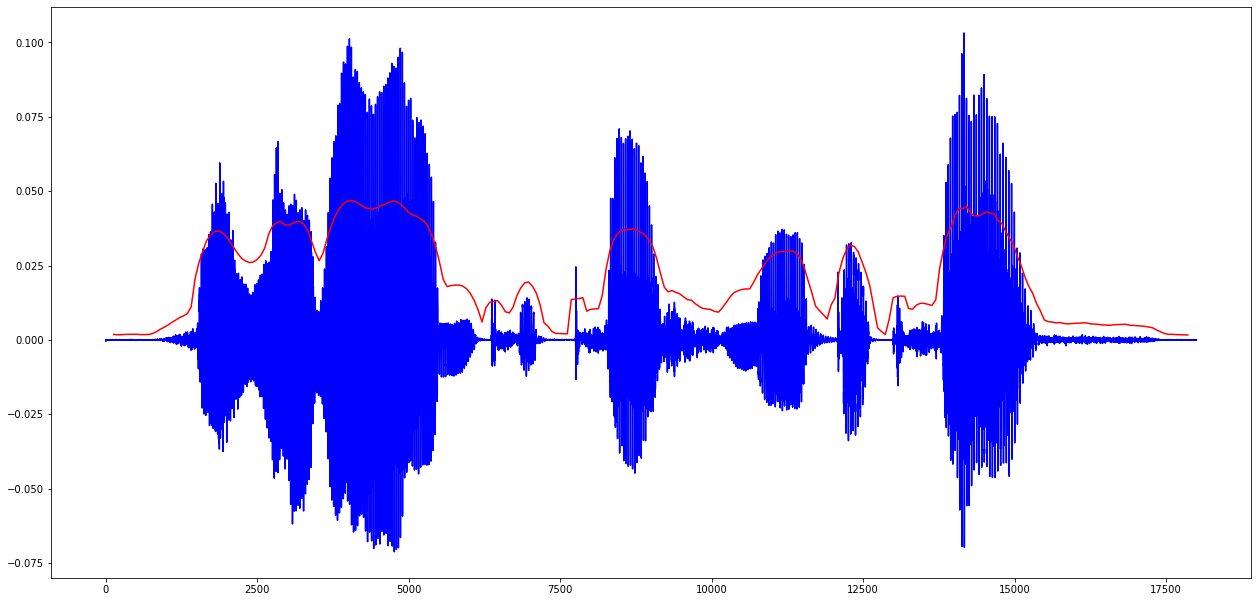

In [132]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.plot(np.arange(stop=len(speech_data), dtype=np.int32),speech_data, c='b')
plt.plot(np.array(v_time_frame*sampling_rate, dtype=np.int32), np.sqrt(powers), c='r')
plt.show()

2.3.a)

2.3.b)

In [133]:
def zero_crossings(x):
    return np.sum(x[:-1]*x[1:] < 0)

In [134]:
#crossings = np.zeros(m_frames.shape[0], dtype=np.float16)
#num_frame_samples = len(m_frames[0])
#for idx, item in enumerate(m_frames):
#    crossings[idx] = zero_crossings(item)/num_frame_samples
#
#crossings

In [135]:
def is_voiced(x, threshold):
    num_frame_samples = len(m_frames[0])
    crossings = zero_crossings(item)/num_frame_samples
    return 1 if crossings < threshold else 0

In [136]:
threshold = 0.2
voiced_unvoiced = np.zeros(m_frames.shape[0])
for idx, item in enumerate(m_frames):
    voiced_unvoiced[idx] = is_voiced(item, threshold)

voiced_unvoiced

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

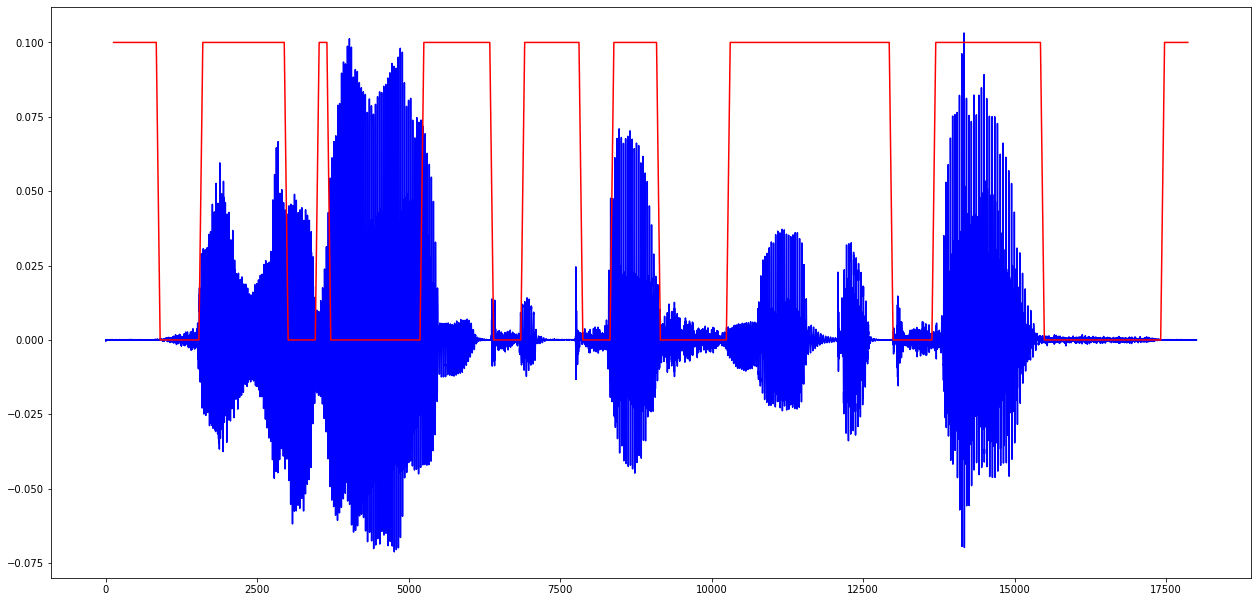

In [137]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.plot(np.arange(stop=len(speech_data), dtype=np.int32),speech_data, c='b')
plt.plot(np.array(v_time_frame*sampling_rate, dtype=np.int32), voiced_unvoiced*0.1, c='r')
plt.show()

2.3.g) Silence

In [138]:
#2.4)
def auto_correlation(frames):
    acf = np.convolve(frames[0], np.flip(frames[0]))
    acf_size = acf.shape[0]
    acfs = np.zeros((frames.shape[0], acf_size))
    for i in range(frames.shape[0]):
        acfs[i] = np.convolve(frames[i], np.flip(frames[i]))

    return acfs

In [139]:
def remove_negatives(acfs):
    acfs_positive = np.zeros((acfs.shape[0], int(acfs.shape[1]/2)+1))
    for i in range(acfs.shape[0]):
        acfs_positive[i] = acfs[i][int(acfs.shape[1]/2):acfs.shape[1]]
    return acfs_positive

In [140]:
def calc_fundamental_freqs(acfs_positive):
    search_range_min = int(16000/400)
    search_range_max = int(16000/80)

    fundamental_freqs = np.zeros(acfs_positive.shape[0])
    for i in range(acfs_positive.shape[0]):
        acf_range = acfs_positive[i][search_range_min: search_range_max+1]
        sample_idx = acf_range.argmax() + search_range_min
        millis = sample_idx / 16000
        fundamental_freqs[i] = 1 / millis
    return fundamental_freqs

In [141]:
def estimate_f0(m_frames):
    acfs = auto_correlation(m_frames)
    acfs_positive = remove_negatives(acfs)
    fundamental_freqs = calc_fundamental_freqs(acfs_positive)
    return fundamental_freqs

In [142]:
fundamental_freqs = estimate_f0(m_frames)
fundamental_freqs

array([246.15384615, 400.        , 390.24390244, 390.24390244,
       301.88679245, 326.53061224, 326.53061224, 340.42553191,
       340.42553191, 333.33333333, 333.33333333, 347.82608696,
       197.5308642 , 135.59322034, 134.45378151, 296.2962963 ,
       200.        , 156.8627451 , 117.64705882, 320.        ,
       132.23140496, 253.96825397, 258.06451613, 262.29508197,
       262.29508197, 262.29508197, 262.29508197, 262.29508197,
       262.29508197, 262.29508197, 262.29508197, 262.29508197,
       262.29508197, 262.29508197, 262.29508197, 262.29508197,
       262.29508197, 262.29508197, 266.66666667, 271.18644068,
       275.86206897, 275.86206897, 271.18644068, 271.18644068,
       266.66666667, 266.66666667, 266.66666667, 262.29508197,
       262.29508197, 262.29508197, 258.06451613, 258.06451613,
       258.06451613, 253.96825397, 258.06451613, 258.06451613,
       258.06451613, 253.96825397, 253.96825397, 250.        ,
       246.15384615, 246.15384615, 242.42424242, 242.42

In [143]:
def compute_freq_axis(m_stft: np.ndarray):
    return np.linspace(0, sampling_rate//2, num=m_stft.shape[1])

def remove_upper_half_spectrum(m_stft: np.ndarray) -> np.ndarray:
    m_stft_new = m_stft[:, :(int(m_stft.shape[1]/2)+1)]
    return m_stft_new

In [144]:
def compute_stft(v_signal: np.ndarray, fs: int, frame_length: int, frame_shift: int, v_analysis_window: np.ndarray) -> [np.ndarray, np.ndarray, np.ndarray]:
    m_frames, v_time_frame = my_windowing(v_signal, fs, frame_length, frame_shift)
    m_stft_full = np.zeros(m_frames.shape, dtype=np.complex128)
    #v_analysis_window = v_analysis_window(m_frames.shape[1])
    for i in range(m_frames.shape[0]):
        m_stft_full[i] = np.fft.fft(m_frames[i]*v_analysis_window)
    #v_freq = np.fft.rfftfreq(m_stft_full.shape[1], 1/fs)
    m_stft = remove_upper_half_spectrum(m_stft_full)
    v_freq = compute_freq_axis(m_stft)
    return [m_stft, v_freq, v_time_frame]

In [145]:
from scipy.signal import get_window

millis_per_sample = 1000 / sampling_rate
frame_length_samples = int(frame_length / millis_per_sample)
analysis_window = get_window('hann', int(frame_length_samples), fftbins=True)
m_stft, v_freq, v_time_frame = compute_stft(speech_data, sampling_rate, frame_length, frame_shift, analysis_window)

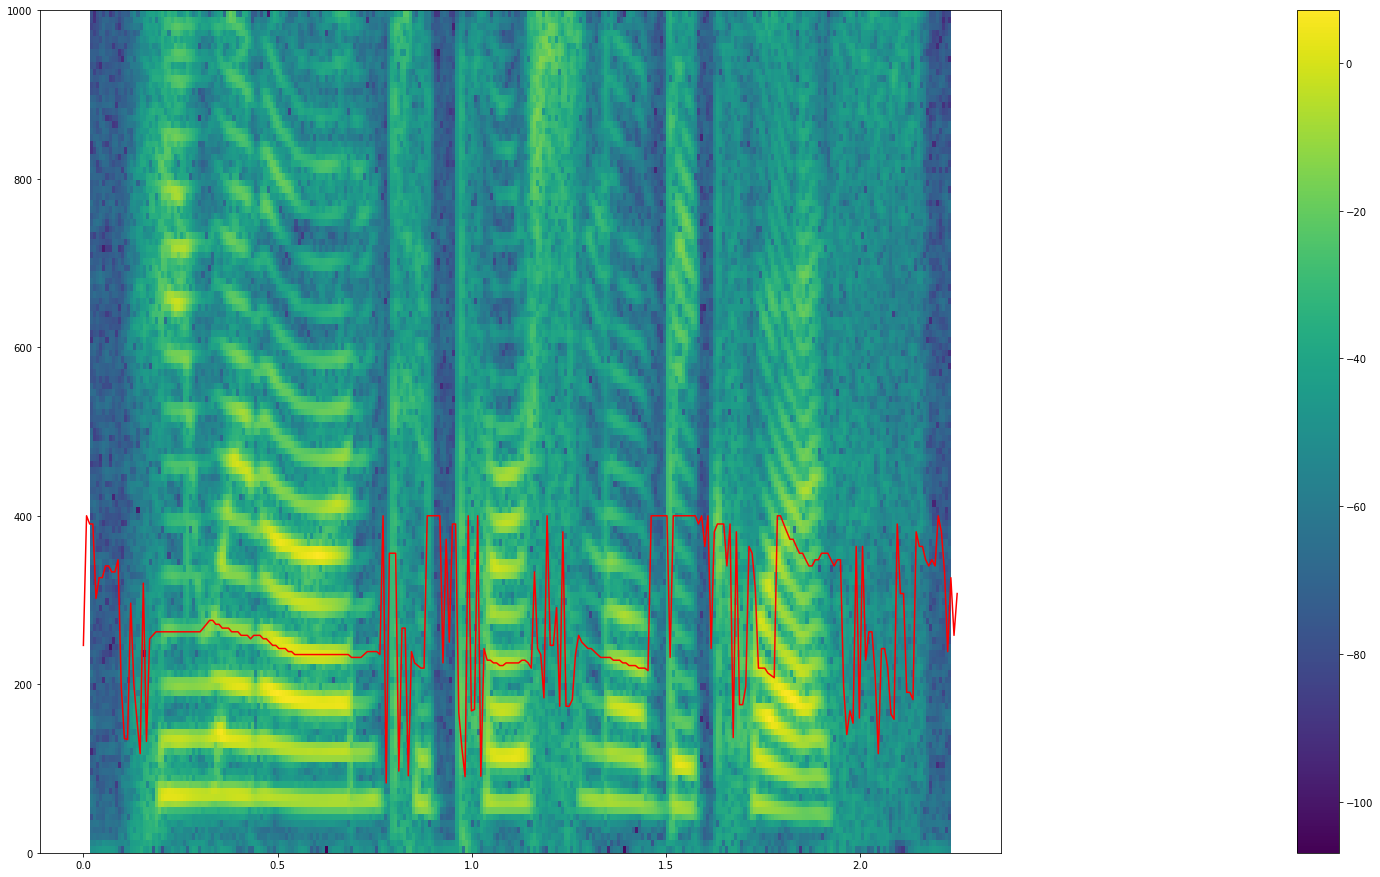

In [146]:
fig = plt.figure()
fig.set_size_inches(26.5, 15.5)
ax = fig.add_subplot(111)
im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft.T)), 10**(-15))),
               cmap='viridis', origin='lower', extent=[v_time_frame[0], v_time_frame[-1], v_freq[0],
                                                       1000], aspect='auto')
fig.colorbar(im, orientation="vertical", pad=0.2)
ax.plot(np.linspace(0, speech_data.shape[0]/sampling_rate, num=fundamental_freqs.shape[0], dtype=np.float32), fundamental_freqs, c='r', linewidth=1.5)

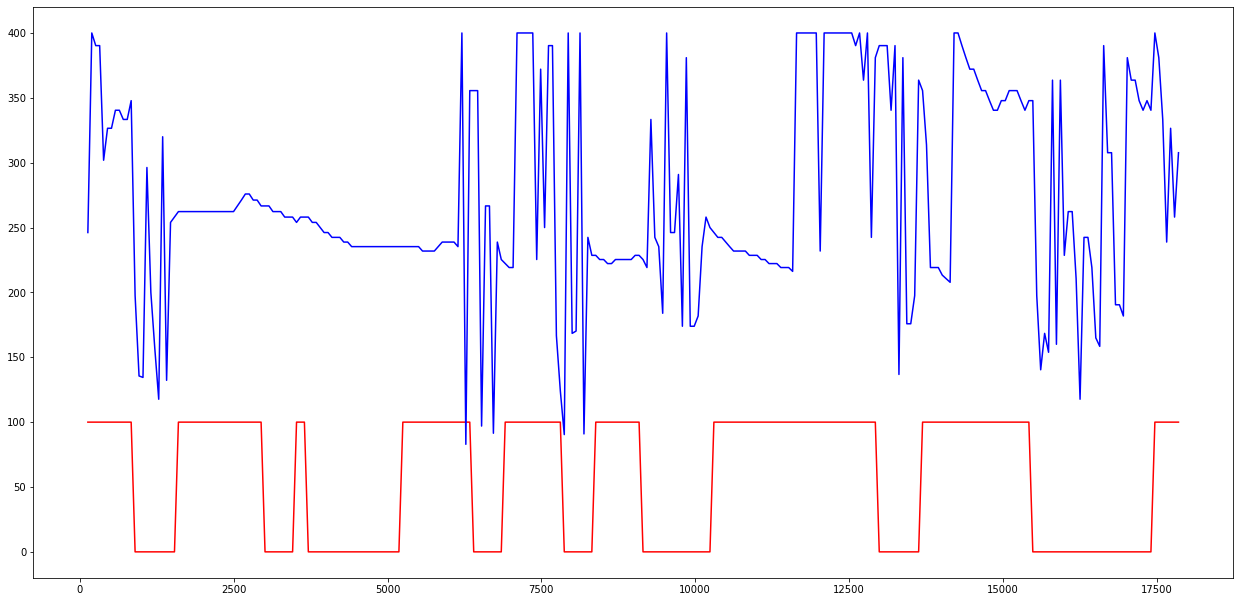

In [147]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.plot(np.array(v_time_frame*sampling_rate, dtype=np.int32), voiced_unvoiced*100, c='r')
plt.plot(np.array(v_time_frame*sampling_rate, dtype=np.int32), fundamental_freqs, c='b')
plt.show()

In [148]:
#2.5.a)
m_frames.shape

(278, 256)

In [149]:
#2.5.b)
from scipy.linalg import solve_toeplitz

def lpc(m_frame: np.ndarray, M: int) -> np.ndarray:
    autocorr_full = np.correlate(m_frame, m_frame, mode='full')
    autocorr = autocorr_full[len(m_frame)-1:len(m_frame)+M]
    coefficients = solve_toeplitz((-1)*autocorr[:-1], autocorr[1:])
    return coefficients

def compute_lpc(m_frames: np.ndarray, M: int) -> np.ndarray:
    m_lpc = np.zeros((m_frames.shape[0], M))
    for i in range(m_frames.shape[0]):
        m_lpc[i] = lpc(m_frames[i], M)
    return m_lpc

In [150]:
#2.5.c) The order M of the LPC are chosen with respect to the sampling rate of the signal. 1 coefficient is used for every 1000Hz of the sampling rate. And then typically 2-4 more coefficients are added to better fit the signal. So, for a sampling rate of 4kHz, the order M would be 6-8.

M = 8

m_lpc = compute_lpc(m_frames, M)

In [151]:
m_lpc.shape

(278, 8)

In [152]:
m_lpc

array([[-0.23761667, -0.17539738, -0.04478383, ..., -0.01106859,
        -0.02646035, -0.08149076],
       [-0.39563737, -0.05856876, -0.22116769, ...,  0.02009938,
        -0.07667566,  0.05227734],
       [-0.2175969 , -0.14224259, -0.18894562, ..., -0.11119586,
        -0.05983754,  0.04350057],
       ...,
       [-0.38296586, -0.12363136, -0.18375824, ...,  0.06683343,
        -0.09593068, -0.07936835],
       [-0.34848946, -0.10397129, -0.23385687, ...,  0.05242006,
        -0.10140184, -0.06854604],
       [-0.32051356, -0.16034044, -0.19949394, ...,  0.07298668,
        -0.0524125 , -0.0981567 ]])

In [177]:
#3.1.a)
fund_period = 100

unvoiced_ex = np.random.randn(18070)
voiced_ex = np.zeros(18070)
voiced_ex[::fund_period] = 1

In [178]:
#3.1.b)
def segment_signal(signal, R):
    num_segments = int(np.ceil(signal.shape[0] / R))
    print(num_segments)
    return np.array(np.array_split(signal, num_segments))

In [179]:
unvoiced_ex.shape

(18070,)

In [180]:
R = 65
unvoiced_ex_segments = segment_signal(unvoiced_ex, R)
unvoiced_ex_segments

278


array([[-1.70530532, -0.01536245, -1.60169811, ..., -0.65269884,
        -1.00122182,  0.18093674],
       [-0.19172158,  1.33541164, -1.19378229, ...,  0.60914595,
        -1.16690424, -0.57404301],
       [ 1.8490125 ,  1.49886867,  0.71532284, ..., -0.75642025,
        -0.70543891, -0.28817315],
       ...,
       [-1.00946462, -1.30754533, -1.84162531, ..., -2.0329506 ,
        -0.06244006, -0.26801148],
       [-0.5434172 ,  1.13874561, -0.0566839 , ...,  0.21786883,
         0.07082123,  0.1527758 ],
       [ 1.08634147,  0.49394163, -0.23708017, ..., -0.30059556,
         1.85579284,  0.75785196]])

In [181]:
voiced_ex_segments = segment_signal(voiced_ex, R)
voiced_ex_segments

278


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [182]:
#3.1.c)
from filteradaptively import filter_adaptively

voiced_ex_segment_filtered = np.zeros(voiced_ex_segments.shape)
unvoiced_ex_segment_filtered = np.zeros(unvoiced_ex_segments.shape)

filter_state_voiced = None
filter_state_unvoiced = None

for i in range(voiced_ex_segments.shape[0]):
    voiced_ex_segment_filtered[i], filter_state_voiced = filter_adaptively(np.array([1]), m_lpc[i], voiced_ex_segments[i], filter_state_voiced)
    unvoiced_ex_segment_filtered[i], filter_state_unvoiced = filter_adaptively(np.array([1]), m_lpc[i], unvoiced_ex_segments[i], filter_state_unvoiced)

In [183]:
voiced_ex_segment_filtered

array([[-4.20845897e+00,  3.10648525e+00, -1.49988824e+00, ...,
         2.49798340e-02,  1.31845465e-01, -2.18726983e-01],
       [ 2.01668228e-01,  2.34366191e-02, -1.94605768e-01, ...,
        -4.07389110e-02,  1.18790127e-03,  1.97662699e-02],
       [-2.92711258e-02,  3.76015960e-02, -1.14850676e-02, ...,
         5.59595651e+01, -9.08451031e+01,  4.56263541e+01],
       ...,
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])

In [184]:
voiced_ex_reconstructed = np.concatenate(voiced_ex_segment_filtered)
unvoiced_ex_reconstructed = np.concatenate(unvoiced_ex_segment_filtered)

In [185]:
voiced_ex_reconstructed

array([-4.20845897,  3.10648525, -1.49988824, ...,         nan,
               nan,         nan])

In [186]:
unvoiced_ex_reconstructed

array([ 7.17670745, -5.23285358,  9.25072494, ...,         nan,
               nan,         nan])

In [187]:
import sounddevice as sd

sd.play(voiced_ex_reconstructed, sampling_rate)

In [188]:
sd.play(unvoiced_ex_reconstructed, sampling_rate)

In [189]:
m_stft_voiced_ex, v_freq, v_time_frame = compute_stft(voiced_ex_reconstructed, sampling_rate, frame_length, frame_shift, analysis_window)

C:\Users\aonti\AppData\Local\Temp/ipykernel_28308/2731105152.py:4: RuntimeWarning: overflow encountered in square
  im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft_voiced_ex.T)), 10**(-15))),


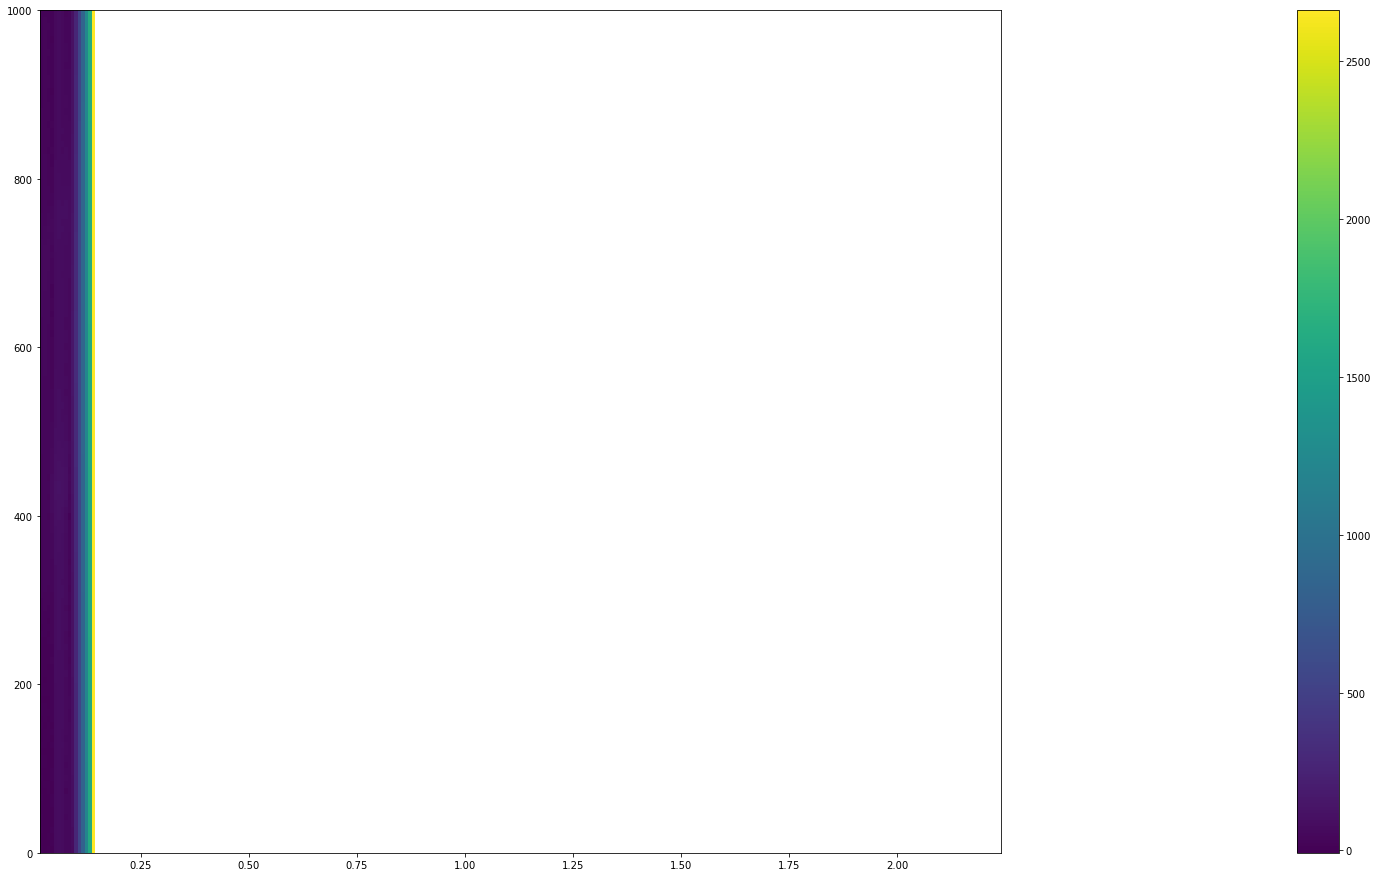

In [190]:
fig = plt.figure()
fig.set_size_inches(26.5, 15.5)
ax = fig.add_subplot(111)
im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft_voiced_ex.T)), 10**(-15))),
               cmap='viridis', origin='lower', extent=[v_time_frame[0], v_time_frame[-1], v_freq[0],
                                                       1000], aspect='auto')
fig.colorbar(im, orientation="vertical", pad=0.2)

In [191]:
m_stft_unvoiced_ex, v_freq, v_time_frame = compute_stft(unvoiced_ex_reconstructed, sampling_rate, frame_length, frame_shift, analysis_window)

C:\Users\aonti\AppData\Local\Temp/ipykernel_28308/2599303050.py:4: RuntimeWarning: overflow encountered in square
  im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft_unvoiced_ex.T)), 10**(-15))),


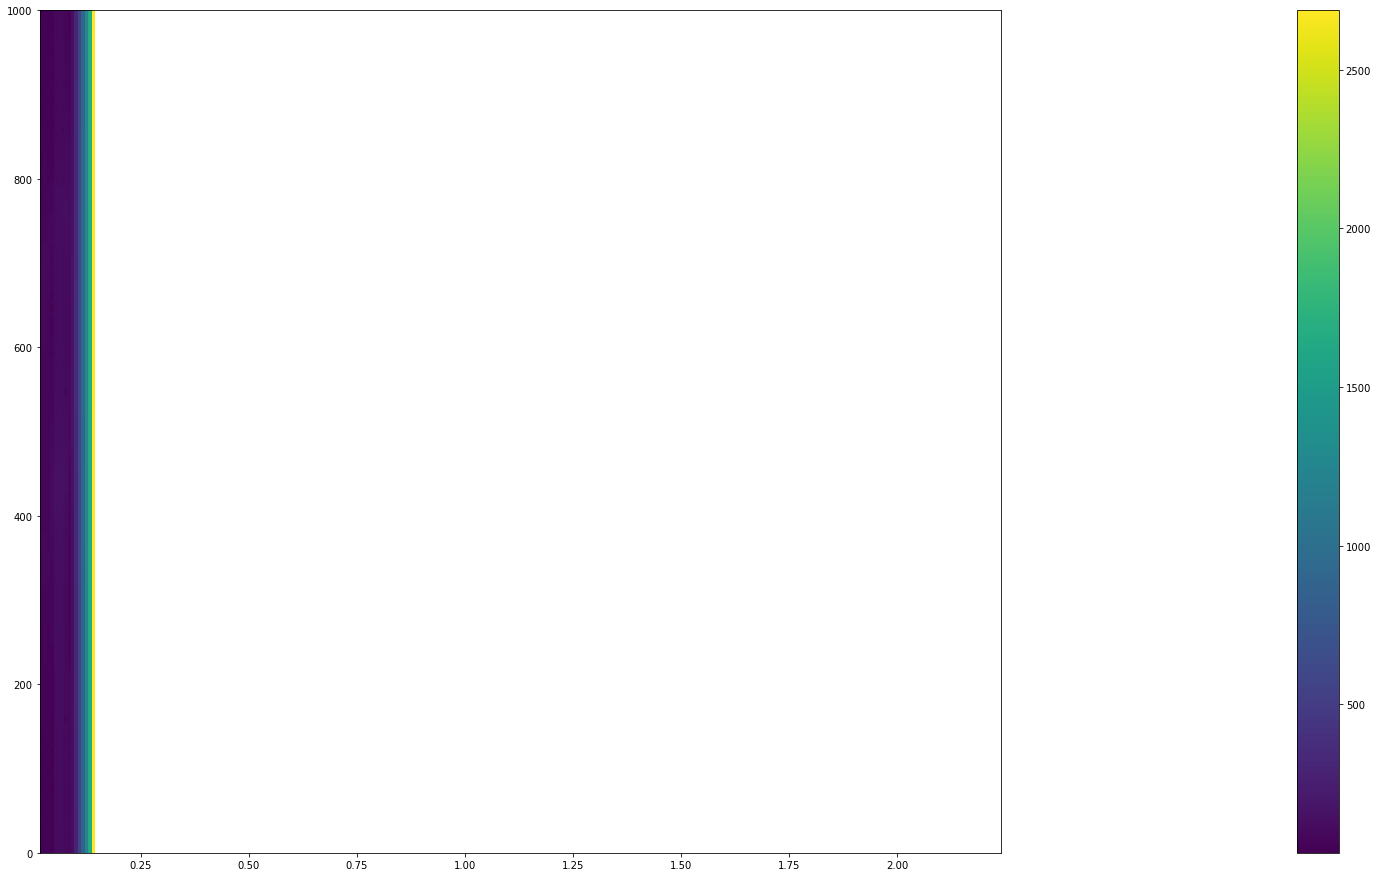

In [192]:
fig = plt.figure()
fig.set_size_inches(26.5, 15.5)
ax = fig.add_subplot(111)
im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft_unvoiced_ex.T)), 10**(-15))),
               cmap='viridis', origin='lower', extent=[v_time_frame[0], v_time_frame[-1], v_freq[0],
                                                       1000], aspect='auto')
fig.colorbar(im, orientation="vertical", pad=0.2)

In [195]:
#3.2)
voiced_unvoiced

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [194]:
voiced_ex_segments.shape

(278, 65)

In [196]:
switched_ex = np.zeros(voiced_ex_segments.shape)

for i in range(voiced_ex_segments.shape[0]):
    if voiced_unvoiced[i] == 1:
        switched_ex[i] = voiced_ex_segments[i]
    else:
        switched_ex[i] = unvoiced_ex_segments[i]

In [197]:
switched_ex

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [198]:
switched_ex_filtered = np.zeros(switched_ex.shape)

filter_state = None

for i in range(switched_ex.shape[0]):
    switched_ex_filtered[i], filter_state = filter_adaptively(np.array([1]), m_lpc[i], switched_ex[i], filter_state)

In [199]:
switched_ex_filtered

array([[-4.20845897e+00,  3.10648525e+00, -1.49988824e+00, ...,
         2.49798340e-02,  1.31845465e-01, -2.18726983e-01],
       [ 2.01668228e-01,  2.34366191e-02, -1.94605768e-01, ...,
        -4.07389110e-02,  1.18790127e-03,  1.97662699e-02],
       [-2.92711258e-02,  3.76015960e-02, -1.14850676e-02, ...,
         5.59595651e+01, -9.08451031e+01,  4.56263541e+01],
       ...,
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])

In [200]:
switched_ex_reconstructed = np.concatenate(switched_ex_filtered)

In [201]:
switched_ex_reconstructed

array([-4.20845897,  3.10648525, -1.49988824, ...,         nan,
               nan,         nan])

In [202]:
sd.play(switched_ex_reconstructed, sampling_rate)

In [203]:
#3.3.a)
powers

array([3.38646715e-06, 3.00870644e-06, 3.07874002e-06, 3.48368626e-06,
       3.56034864e-06, 3.75461954e-06, 3.63148361e-06, 3.16073265e-06,
       3.20537797e-06, 3.46322991e-06, 4.54248402e-06, 7.45415602e-06,
       1.27982152e-05, 1.77577833e-05, 2.49830933e-05, 3.46784311e-05,
       4.45704069e-05, 5.64051448e-05, 6.51572285e-05, 7.83857962e-05,
       1.23473608e-04, 4.24368763e-04, 6.75697171e-04, 8.96957090e-04,
       1.11594164e-03, 1.24741432e-03, 1.32590591e-03, 1.34649045e-03,
       1.30181224e-03, 1.21630917e-03, 1.08765785e-03, 9.62337861e-04,
       8.44391038e-04, 7.53460464e-04, 7.02925519e-04, 6.76480326e-04,
       6.84760241e-04, 7.31340364e-04, 8.11592200e-04, 9.58854917e-04,
       1.26665548e-03, 1.46719227e-03, 1.55221211e-03, 1.58981421e-03,
       1.50528364e-03, 1.48085912e-03, 1.52705592e-03, 1.58317540e-03,
       1.58647061e-03, 1.51490434e-03, 1.35872371e-03, 1.11352048e-03,
       8.73412932e-04, 7.08920105e-04, 8.49124665e-04, 1.14905612e-03,
      

In [204]:
powers_switched = np.zeros(powers.shape)
for i in range(switched_ex.shape[0]):
    powers_switched[i] = compute_power(switched_ex[i])

In [205]:
powers_switched

array([0.01538462, 0.01538462, 0.        , 0.01538462, 0.01538462,
       0.        , 0.01538462, 0.01538462, 0.        , 0.01538462,
       0.01538462, 0.        , 0.12284784, 0.12543117, 0.12338903,
       0.12294719, 0.11145124, 0.14554818, 0.11777516, 0.135013  ,
       0.12642011, 0.10854983, 0.13863363, 0.01538462, 0.01538462,
       0.        , 0.01538462, 0.01538462, 0.        , 0.01538462,
       0.01538462, 0.        , 0.01538462, 0.01538462, 0.        ,
       0.01538462, 0.01538462, 0.        , 0.01538462, 0.        ,
       0.01538462, 0.01538462, 0.        , 0.01538462, 0.01538462,
       0.12307034, 0.15148886, 0.13141284, 0.12653381, 0.11995932,
       0.12138944, 0.12253939, 0.11250506, 0.01538462, 0.        ,
       0.01538462, 0.11756063, 0.12914318, 0.1280789 , 0.10601153,
       0.11806634, 0.12135734, 0.12494621, 0.10956077, 0.13161228,
       0.11369703, 0.1113819 , 0.11143748, 0.13039946, 0.12708316,
       0.14755385, 0.12054201, 0.14031745, 0.13344687, 0.13084

In [241]:
g = np.zeros(powers.shape)
for i in range(powers.shape[0]):
    g[i] = np.sqrt(powers[i] / (powers_switched[i]+10**(-20)))

In [242]:
g

array([1.48364539e-02, 1.39844885e-02, 1.75463387e+07, 1.50479104e-02,
       1.52125823e-02, 1.93768407e+07, 1.53638027e-02, 1.43334442e-02,
       1.79035694e+07, 1.50036643e-02, 1.71831738e-02, 2.73023003e+07,
       1.02068313e-02, 1.18984844e-02, 1.42293426e-02, 1.67946289e-02,
       1.99977364e-02, 1.96859312e-02, 2.35209279e-02, 2.40952194e-02,
       3.12520839e-02, 6.25254927e-02, 6.98138756e-02, 2.41458508e-01,
       2.69325465e-01, 3.53187531e+08, 2.93570918e-01, 2.95840969e-01,
       3.60806352e+08, 2.81176272e-01, 2.65890504e-01, 3.10215709e+08,
       2.34276370e-01, 2.21302802e-01, 2.65127426e+08, 2.09693160e-01,
       2.10972547e-01, 2.70433053e+08, 2.29681286e-01, 3.09653826e+08,
       2.86936590e-01, 3.08816285e-01, 3.93981231e+08, 3.21462165e-01,
       3.12799355e-01, 1.09693318e-01, 1.00400788e-01, 1.09760382e-01,
       1.11972846e-01, 1.12376528e-01, 1.05797432e-01, 9.53259718e-02,
       8.81097115e-02, 2.14662076e-01, 2.91397437e+08, 2.73292239e-01,
      

In [245]:
g.reshape(g.shape[0], 1)
g.shape

(278, 1)

In [246]:

switched_ex_scaled = np.multiply(switched_ex, g)

In [247]:
powers_switched_scaled = np.zeros(powers.shape)
for i in range(switched_ex_scaled.shape[0]):
    powers_switched_scaled[i] = compute_power(switched_ex_scaled[i])

In [248]:
powers_switched_scaled

array([0.00022825, 0.00021515, 0.        , 0.00023151, 0.00023404,
       0.        , 0.00023637, 0.00022051, 0.        , 0.00023083,
       0.00026436, 0.        , 0.00125389, 0.00149244, 0.00175574,
       0.00206485, 0.00222877, 0.00286525, 0.00277018, 0.00325317,
       0.00395089, 0.00678713, 0.00967855, 0.00371475, 0.00414347,
       0.        , 0.00451648, 0.0045514 , 0.        , 0.00432579,
       0.00409062, 0.        , 0.00360425, 0.00340466, 0.        ,
       0.00322605, 0.00324573, 0.        , 0.00353356, 0.        ,
       0.00441441, 0.00475102, 0.        , 0.00494557, 0.0048123 ,
       0.01349999, 0.0152096 , 0.01442392, 0.01416835, 0.01348061,
       0.01284269, 0.01168119, 0.00991279, 0.00330249, 0.        ,
       0.0042045 , 0.01300199, 0.01484041, 0.01565838, 0.01481335,
       0.01599531, 0.01632685, 0.01649464, 0.01523184, 0.01637602,
       0.01495062, 0.01474296, 0.01470672, 0.01606961, 0.01611956,
       0.01750471, 0.01605666, 0.0175113 , 0.01697026, 0.01650

In [249]:
powers

array([3.38646715e-06, 3.00870644e-06, 3.07874002e-06, 3.48368626e-06,
       3.56034864e-06, 3.75461954e-06, 3.63148361e-06, 3.16073265e-06,
       3.20537797e-06, 3.46322991e-06, 4.54248402e-06, 7.45415602e-06,
       1.27982152e-05, 1.77577833e-05, 2.49830933e-05, 3.46784311e-05,
       4.45704069e-05, 5.64051448e-05, 6.51572285e-05, 7.83857962e-05,
       1.23473608e-04, 4.24368763e-04, 6.75697171e-04, 8.96957090e-04,
       1.11594164e-03, 1.24741432e-03, 1.32590591e-03, 1.34649045e-03,
       1.30181224e-03, 1.21630917e-03, 1.08765785e-03, 9.62337861e-04,
       8.44391038e-04, 7.53460464e-04, 7.02925519e-04, 6.76480326e-04,
       6.84760241e-04, 7.31340364e-04, 8.11592200e-04, 9.58854917e-04,
       1.26665548e-03, 1.46719227e-03, 1.55221211e-03, 1.58981421e-03,
       1.50528364e-03, 1.48085912e-03, 1.52705592e-03, 1.58317540e-03,
       1.58647061e-03, 1.51490434e-03, 1.35872371e-03, 1.11352048e-03,
       8.73412932e-04, 7.08920105e-04, 8.49124665e-04, 1.14905612e-03,
      

3.3.b) to pick the best g, we use the following formula: $g = \sqrt{\frac{P2}{P1}}$ where P2 is the power of the signal we want to match.

In [251]:
#3.3.c)
switched_ex_scaled_filtered = np.zeros(switched_ex_scaled.shape)

filter_state = None

for i in range(switched_ex_scaled.shape[0]):
    switched_ex_scaled_filtered[i], filter_state = filter_adaptively(np.array([1]), m_lpc[i], switched_ex_scaled[i], filter_state)

In [252]:
switched_ex_scaled_reconstructed = np.concatenate(switched_ex_scaled_filtered)

In [253]:
sd.play(switched_ex_scaled_reconstructed, sampling_rate)

In [254]:
#3.3.d)
m_stft, v_freq, v_time_frame = compute_stft(switched_ex_scaled_reconstructed, sampling_rate, frame_length, frame_shift, analysis_window)

C:\Users\aonti\AppData\Local\Temp/ipykernel_28308/4065327227.py:4: RuntimeWarning: overflow encountered in square
  im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft.T)), 10**(-15))),


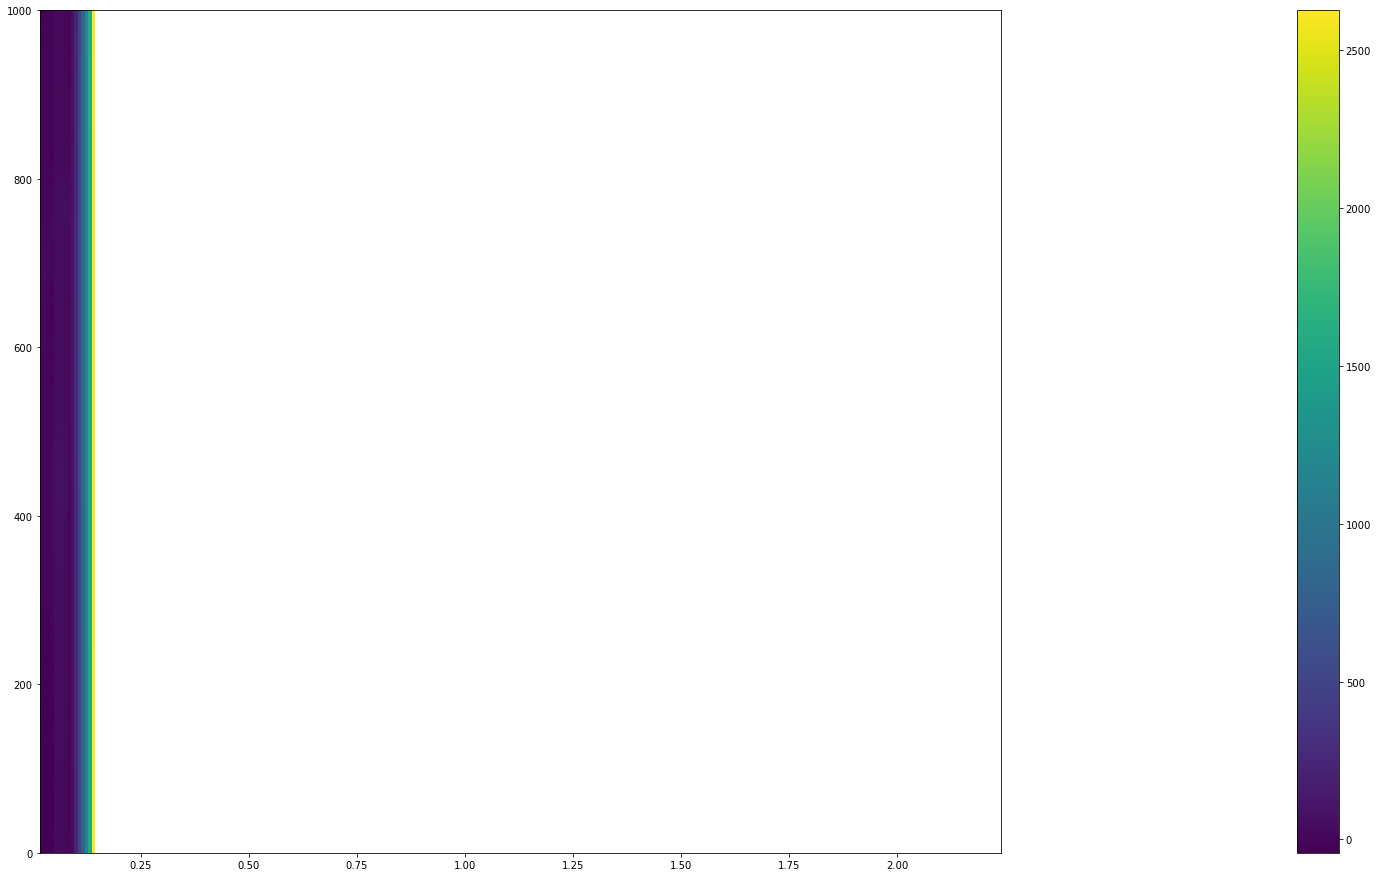

In [255]:
fig = plt.figure()
fig.set_size_inches(26.5, 15.5)
ax = fig.add_subplot(111)
im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft.T)), 10**(-15))),
               cmap='viridis', origin='lower', extent=[v_time_frame[0], v_time_frame[-1], v_freq[0],
                                                       1000], aspect='auto')
fig.colorbar(im, orientation="vertical", pad=0.2)

In [ ]:
#3.4

In [264]:
fundamental_freqs = np.array(fundamental_freqs, dtype=np.int32)

In [265]:
fundamental_freqs

array([246, 400, 390, 390, 301, 326, 326, 340, 340, 333, 333, 347, 197,
       135, 134, 296, 200, 156, 117, 320, 132, 253, 258, 262, 262, 262,
       262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 266,
       271, 275, 275, 271, 271, 266, 266, 266, 262, 262, 262, 258, 258,
       258, 253, 258, 258, 258, 253, 253, 250, 246, 246, 242, 242, 242,
       238, 238, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235,
       235, 235, 235, 235, 235, 235, 235, 231, 231, 231, 231, 235, 238,
       238, 238, 238, 235, 400,  82, 355, 355, 355,  96, 266, 266,  91,
       238, 225, 222, 219, 219, 400, 400, 400, 400, 400, 225, 372, 250,
       390, 390, 166, 124,  90, 400, 168, 170, 400,  90, 242, 228, 228,
       225, 225, 222, 222, 225, 225, 225, 225, 225, 228, 228, 225, 219,
       333, 242, 235, 183, 400, 246, 246, 290, 173, 380, 173, 173, 181,
       235, 258, 250, 246, 242, 242, 238, 235, 231, 231, 231, 231, 228,
       228, 228, 225, 225, 222, 222, 222, 219, 219, 219, 216, 40

In [279]:
variable_f0_signal = np.zeros(voiced_ex_segments.shape)

In [280]:
variable_f0_signal.shape

(278, 65)

In [281]:
counter = 0

for i in range(fundamental_freqs.shape[0]):
    f0 = fundamental_freqs[i]
    if voiced_unvoiced[i] == 1:
        for j in range(variable_f0_signal[i].shape[0]):
            counter = counter + 1
            if counter == f0:
                print(f'matched frequency {f0} at index [{i}][{j}]')
                variable_f0_signal[i][j] = 1
                counter = 0
            else:
                variable_f0_signal[i][j] = 0
    else:
        variable_f0_signal[i] = unvoiced_ex_segments[i]

matched frequency 301 at index [4][40]
matched frequency 333 at index [9][48]
matched frequency 262 at index [24][50]
matched frequency 262 at index [28][52]
matched frequency 262 at index [32][54]
matched frequency 262 at index [36][56]
matched frequency 275 at index [41][6]


In [282]:
variable_f0_signal

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [283]:
variable_f0_signal_scaled = g*variable_f0_signal
variable_f0_signal_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [284]:
variable_f0_signal_scaled_filtered = np.zeros(variable_f0_signal_scaled.shape)

filter_state = None

for i in range(variable_f0_signal_scaled.shape[0]):
    variable_f0_signal_scaled_filtered[i], filter_state = filter_adaptively(np.array([1]), m_lpc[i], variable_f0_signal_scaled[i], filter_state)

In [285]:
variable_f0_signal_scaled_filtered

array([[ 0.,  0.,  0., ...,  0., -0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [286]:
variable_f0_signal_improved = np.concatenate(variable_f0_signal_scaled_filtered)
variable_f0_signal_improved

array([ 0.,  0.,  0., ..., nan, nan, nan])

In [287]:
sd.play(variable_f0_signal_improved, sampling_rate)

In [288]:
#3.4.e)

C:\Users\aonti\AppData\Local\Temp/ipykernel_28308/1855247403.py:6: RuntimeWarning: overflow encountered in square
  im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft.T)), 10**(-15))),


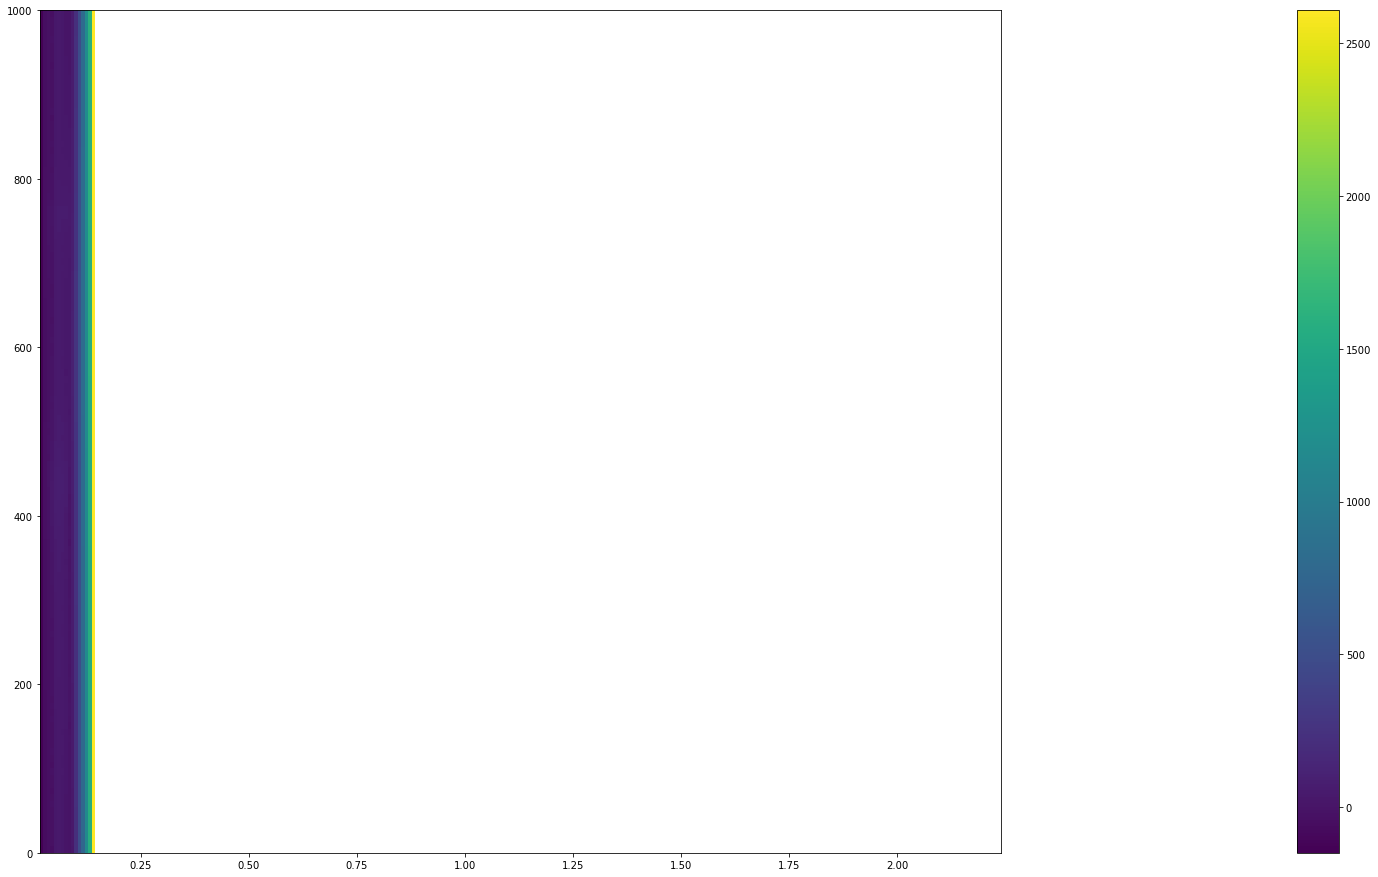

In [289]:
#3.4.f)
m_stft, v_freq, v_time_frame = compute_stft(variable_f0_signal_improved, sampling_rate, frame_length, frame_shift, analysis_window)
fig = plt.figure()
fig.set_size_inches(26.5, 15.5)
ax = fig.add_subplot(111)
im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft.T)), 10**(-15))),
               cmap='viridis', origin='lower', extent=[v_time_frame[0], v_time_frame[-1], v_freq[0],
                                                       1000], aspect='auto')
fig.colorbar(im, orientation="vertical", pad=0.2)

#3.5.a) if the LPC synthesis step is left out then the formants of the speech signal are not taken into consideration and the speech signal won't be intelligible.
This is because only the excitation signal is being considered, which results in either a noise signal or a pure tone.

In [291]:
#3.5.b)
variable_f0_signal_scaled_reconstructed = np.concatenate(variable_f0_signal_scaled)

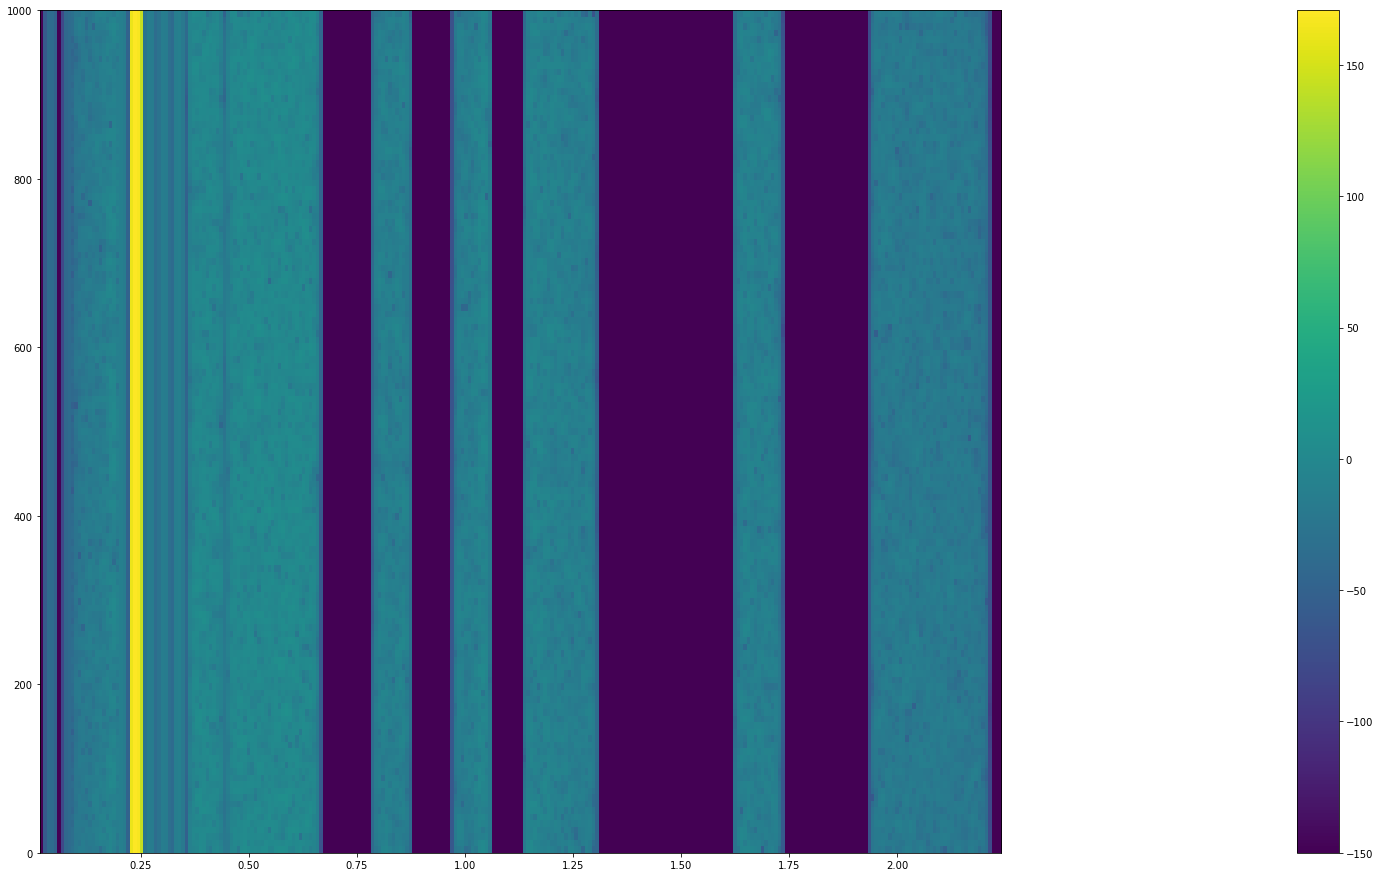

In [292]:
m_stft, v_freq, v_time_frame = compute_stft(variable_f0_signal_scaled_reconstructed, sampling_rate, frame_length, frame_shift, analysis_window)
fig = plt.figure()
fig.set_size_inches(26.5, 15.5)
ax = fig.add_subplot(111)
im = ax.imshow(10*np.log10(np.maximum(np.square(np.abs(m_stft.T)), 10**(-15))),
               cmap='viridis', origin='lower', extent=[v_time_frame[0], v_time_frame[-1], v_freq[0],
                                                       1000], aspect='auto')
fig.colorbar(im, orientation="vertical", pad=0.2)

In [ ]:
#3.5.c)

In [ ]:
#3.5.d)

In [ ]:
#3.5.e)

In [303]:
#4.1.a)
#TODO: implement without using for loop
def quantize_encoder(x: np.ndarray, num_bits: int, x_range: float, x_center: float) -> np.ndarray:
    levels = np.linspace(x_center - x_range/2, x_center + x_range/2, 2**num_bits)
    print("the levels are: ", levels)
    quantized_signal = np.zeros(x.shape)
    for i in range(x.shape[0]):
        quantized_signal[i] = np.argmin(np.abs(x[i] - levels))

    return quantized_signal

4.1.b) $2^{n}$ quantization levels.

4.1.c) x_center should be set to midpoint between x_min and x_max: $\frac{x_{max} + x_{min}}{2}$. The expected quantization levels is 4.
The step size is $\frac{x_{max} - x_{min}}{2^{n}}$, in this case 1.

In [306]:
x = np.array([-2,-1,0,1,2])
x_range = 4
num_bits = 2
x_center = int((np.max(x) + np.min(x))/2)
quantized_signal = quantize_encoder(x, num_bits, x_range, x_center)
step = x_range/((2**num_bits)-1)
step

the levels are:  [-2.         -0.66666667  0.66666667  2.        ]


1.3333333333333333

In [305]:
quantized_signal

array([0., 1., 2., 2., 3.])

In [310]:
def quantize_decoder(quant_idxs: np.ndarray, num_bits: int, x_range: float, x_center: float) -> np.ndarray:
    quantized_x = quant_idxs*(x_range/((2**num_bits)-1)) + x_center - x_range/2
    return quantized_x

In [311]:
quantize_decoder(quantized_signal, num_bits, x_range, x_center)

array([-2.        , -0.66666667,  0.66666667,  0.66666667,  2.        ])

In [313]:
ramp = np.arange(-5, 5, 0.01)
ramp

array([-5.0000000e+00, -4.9900000e+00, -4.9800000e+00, -4.9700000e+00,
       -4.9600000e+00, -4.9500000e+00, -4.9400000e+00, -4.9300000e+00,
       -4.9200000e+00, -4.9100000e+00, -4.9000000e+00, -4.8900000e+00,
       -4.8800000e+00, -4.8700000e+00, -4.8600000e+00, -4.8500000e+00,
       -4.8400000e+00, -4.8300000e+00, -4.8200000e+00, -4.8100000e+00,
       -4.8000000e+00, -4.7900000e+00, -4.7800000e+00, -4.7700000e+00,
       -4.7600000e+00, -4.7500000e+00, -4.7400000e+00, -4.7300000e+00,
       -4.7200000e+00, -4.7100000e+00, -4.7000000e+00, -4.6900000e+00,
       -4.6800000e+00, -4.6700000e+00, -4.6600000e+00, -4.6500000e+00,
       -4.6400000e+00, -4.6300000e+00, -4.6200000e+00, -4.6100000e+00,
       -4.6000000e+00, -4.5900000e+00, -4.5800000e+00, -4.5700000e+00,
       -4.5600000e+00, -4.5500000e+00, -4.5400000e+00, -4.5300000e+00,
       -4.5200000e+00, -4.5100000e+00, -4.5000000e+00, -4.4900000e+00,
       -4.4800000e+00, -4.4700000e+00, -4.4600000e+00, -4.4500000e+00,
      

In [314]:
x_range = 6
x_center = 0
num_bits = 2

quantized_idxs = quantize_encoder(ramp, num_bits, x_range, x_center)
quantized_signal = quantize_decoder(quantized_idxs, num_bits, x_range, x_center)

the levels are:  [-3. -1.  1.  3.]


array([-3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3.,
       -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3., -3

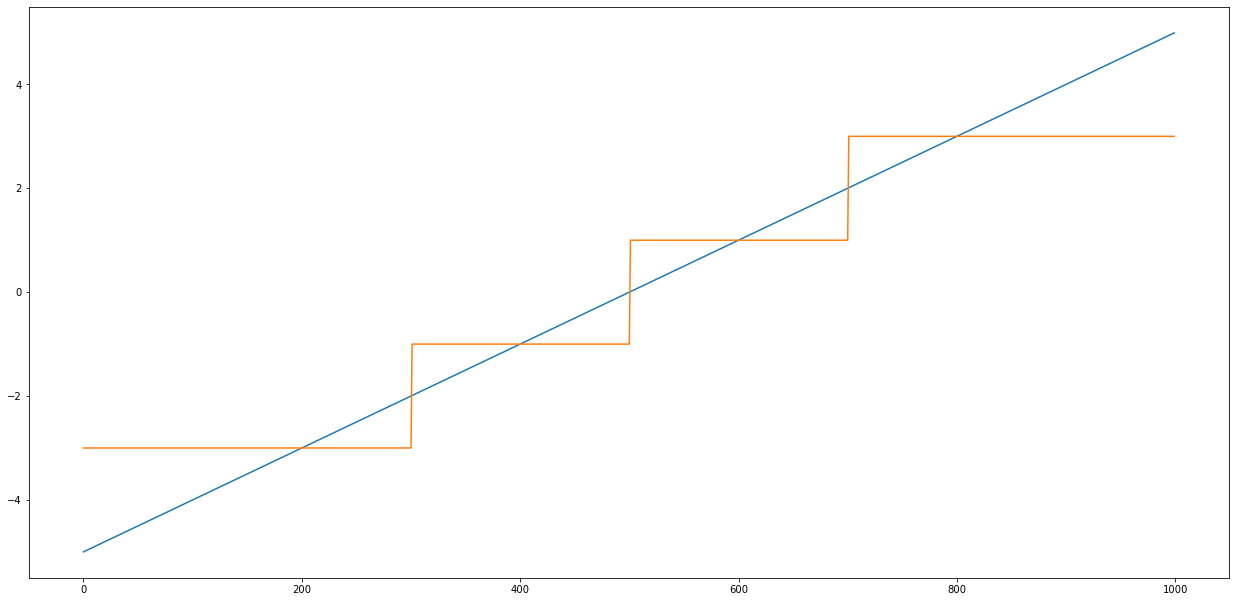

In [316]:
fig, ax = plt.subplots()
fig.set_size_inches(21.5, 10.5)
ax.plot(ramp)
ax.plot(quantized_signal)

In [317]:
x_range = 6
x_center = 1
num_bits = 2

quantized_idxs = quantize_encoder(ramp, num_bits, x_range, x_center)
quantized_signal = quantize_decoder(quantized_idxs, num_bits, x_range, x_center)

the levels are:  [-2.  0.  2.  4.]


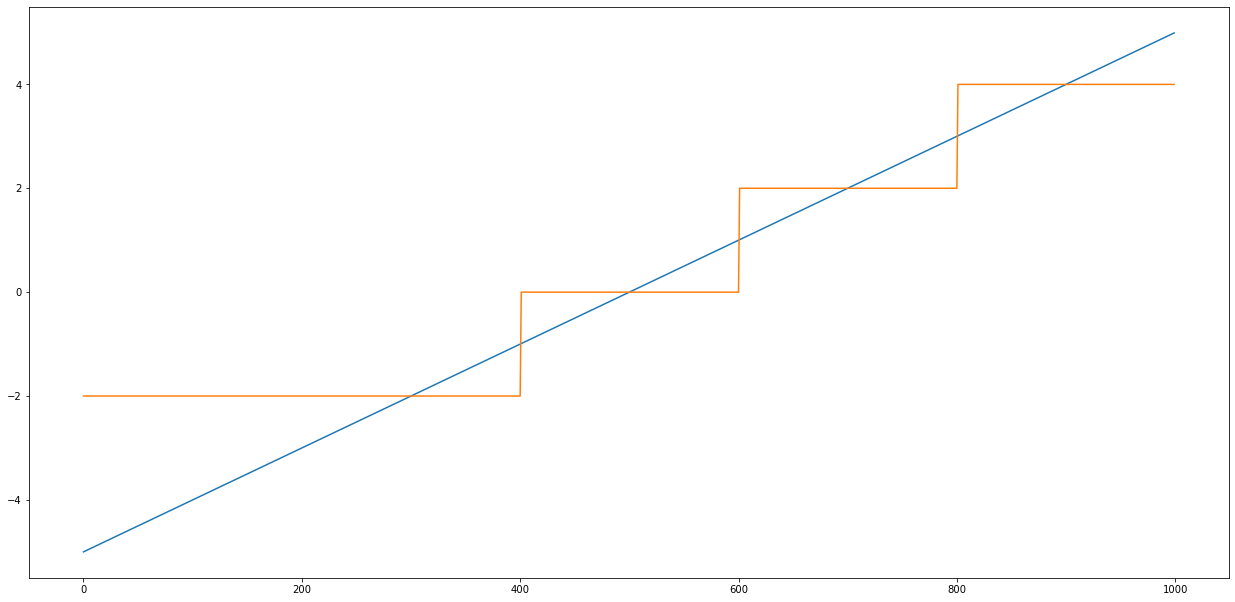

In [318]:
fig, ax = plt.subplots()
fig.set_size_inches(21.5, 10.5)
ax.plot(ramp)
ax.plot(quantized_signal)

In [ ]:
#4.2

If a signal has many values around zero and we want to quantize it with a small number of bits, then it is better to set the x_center to zero.